<a href="https://colab.research.google.com/github/wizardwithcodehazard/Building-a-Perceptron-Model-Using-Data-Structure-Using-C/blob/main/PMC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving irisdata.csv to irisdata (10).csv
     0    1            2
0  5.1  3.5  Iris-setosa
1  4.9  3.0  Iris-setosa
2  4.7  3.2  Iris-setosa
3  4.6  3.1  Iris-setosa
4  5.0  3.6  Iris-setosa


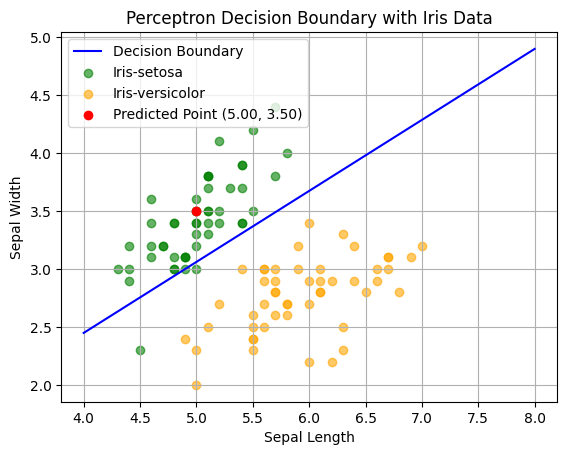

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you uploaded a CSV file called "irisdata.csv"
# Replace 'your_file.csv' with the file name you uploaded
uploaded = files.upload()

# Load the CSV file into a DataFrame
data = pd.read_csv(next(iter(uploaded)), header=None)

# Print the first few rows to confirm the data is loaded correctly
print(data.head())

# Assuming your CSV has no headers, we will assign column names
# Column 0: Sepal Length, Column 1: Sepal Width, Column 2: Species
data.columns = ['SepalLength', 'SepalWidth', 'Species']

# Filter the dataset to include only Iris-setosa and Iris-versicolor
data = data[data['Species'].isin(['Iris-setosa', 'Iris-versicolor'])]

# Convert species labels to numerical values for easier processing
data['Label'] = data['Species'].map({'Iris-setosa': 0, 'Iris-versicolor': 1})

# Extract only the first two features (Sepal Length, Sepal Width) and the species labels
X = data[['SepalLength', 'SepalWidth']].values
y = data['Label'].values  # Use numerical labels

# Use the weights derived from the perceptron training in C
weights = np.array([3.740000,-6.110000])  # Replace with actual weights learned during training

# Define the decision boundary function
def decision_boundary(x):
    return -(weights[0] / weights[1]) * x

# Generate values for feature 1 (Sepal Length)
x_vals = np.linspace(4, 8, 100)

# Calculate corresponding values for feature 2 (Sepal Width) based on the decision boundary
y_vals = decision_boundary(x_vals)

# Plot the decision boundary
plt.plot(x_vals, y_vals, label="Decision Boundary", color='blue')

# Plot the actual data points from the CSV
species_colors = {'Iris-setosa': 'green', 'Iris-versicolor': 'orange'}
for species in np.unique(data['Species']):
    subset = data[data['Species'] == species]
    plt.scatter(subset['SepalLength'], subset['SepalWidth'], color=species_colors[species], label=species, alpha=0.6)

# Mark the point for the predicted input (5.00, 3.50)
plt.scatter(5.00, 3.50, color='red', label="Predicted Point (5.00, 3.50)", zorder=5)

# Customize the plot
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Perceptron Decision Boundary with Iris Data")
plt.legend()
plt.grid(True)

# Display the plot
plt.show()
